In [1]:
import sys,array
import matplotlib.pyplot as plt
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import pandas as pd

%matplotlib inline

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [2]:
tot_on = 543584 #541554 #525613
tot_off = 301061 #218466 #379202
tot_bnbcos = 232250 #384200 #101600

scale_intime = 10.279 
int_per_1e20POT = 99035.2 
dataPOT = 0.495 * (tot_on) / 567157 
mcbnbcos_POT = float(tot_bnbcos)/int_per_1e20POT 
off_to_on = 1.23 * (400675./tot_off) * (tot_on/567157.)

mc_to_onbeam = dataPOT/mcbnbcos_POT
print "POTS : ", dataPOT, mcbnbcos_POT 
print "MC to OnBeam : ", mc_to_onbeam
print "Off to OnBeam: ",off_to_on

POTS :  0.474426093657 2.34512577346
MC to OnBeam :  0.202303048743
Off to OnBeam:  1.56893960342


In [3]:
def makePlots(var,var_min,var_max,nbins=20,xlabel=''):

    x_on, y_on = np.histogram(df0[var].values,bins=nbins,range=(var_min,var_max))
    x_off, y_off = np.histogram(df1[var].values,bins=nbins,range=(var_min,var_max))
    x_bnb, y_bnb = np.histogram(df2[var].values,bins=nbins,range=(var_min,var_max))

    bins = (y_off[:-1] + y_off[1:])/2
    bin_width = bins[1]-bins[0]

    bnbcos_m = x_bnb * mc_to_onbeam 
    off_min_on_m = x_on - x_off*off_to_on

    off_min_on_m = [off_min_on_m[i] if off_min_on_m[i] >=0 else 0 for i in xrange(len(off_min_on_m)) ]

    err_on = np.sqrt(x_on)
    err_off = np.sqrt(x_off)
    err_data = np.sqrt(err_on * err_on + err_off * err_off)
    err_mc = np.sqrt(bnbcos_m)

    fig,ax = plt.subplots(figsize=(8,6))
    plt.bar(bins - bin_width/2,err_mc*2,bin_width,bottom = bnbcos_m - err_mc/2.,\
        alpha=0.5, color='r', linewidth=0,label='Monte Carlo')
    plt.errorbar(bins,off_min_on_m,yerr=err_data,fmt='ko',label='On - OffBeam',markersize=6,lw=1.5)
    plt.grid(True)
    #handles,labels = ax.get_legend_handles_labels()
    plt.xlim(var_min,var_max)
    plt.xlabel(xlabel,fontsize=16,weight='bold')
    plt.legend(loc=0) #handles=handles[::-1],fontsize=12)
    plt.ylim(0)
    plt.savefig('Plots/LL_%s_%s'%(stage,var))
    

In [4]:
def makeMCPlots(var,var_min,var_max,bins=20,xlabel=''):

    x_bnb, y_bnb = np.histogram(df2[var].values,bins=nbins,range=(var_min,var_max))

    bins = (y_bnb[:-1] + y_bnb[1:])/2
    bin_width = bins[1]-bins[0]
    err_mc = np.sqrt(x_bnb)

    fig,ax = plt.subplots(figsize=(8,6))
    plt.errorbar(bins,x_bnb,yerr=err_mc,fmt='ko',label='MCBNBCos',markersize=6,lw=1.5)
    plt.grid(True)
    plt.xlim(var_min,var_max)
    plt.xlabel(xlabel,fontsize=16,weight='bold')
    plt.legend(loc=0) #handles=handles[::-1],fontsize=12)
    plt.ylim(0)
    plt.savefig('Plots/LL_%s_%s'%(stage,var))
    

In [5]:
def make2DPlots(var1,var2,xmin,xmax,ymin,ymax,bins=20,xlabel='',ylabel=''):

    # var2 goes on y axis
    H, xedges, yedges = np.histogram2d(df0[var2].values,df0[var1].values,bins=bins)
    Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

    fig = plt.figure(figsize=(8,6))
    plt.pcolormesh(yedges,xedges,Hmasked)
    plt.grid(True)
    plt.colorbar()
    plt.xlabel(xlabel,fontsize=16,weight='bold')
    plt.ylabel(ylabel,fontsize=16,weight='bold')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.savefig('Plots/LL_%s_%s_%s_2Donbeam'%(stage,var1,var2))
   
    # var2 goes on y axis
    H, xedges, yedges = np.histogram2d(df1[var2].values,df1[var1].values,bins=bins)
    Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

    fig = plt.figure(figsize=(8,6))
    plt.pcolormesh(yedges,xedges,Hmasked)
    plt.grid(True)
    plt.colorbar()
    plt.xlabel(xlabel,fontsize=16,weight='bold')
    plt.ylabel(ylabel,fontsize=16,weight='bold')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.savefig('Plots/LL_%s_%s_%s_2Doffbeam'%(stage,var1,var2))

    
    H, xedges, yedges = np.histogram2d(df2[var2].values,df2[var1].values,bins=bins)
    Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

    fig = plt.figure(figsize=(8,6))
    plt.pcolormesh(yedges,xedges,Hmasked)
    plt.grid(True)
    plt.colorbar()
    plt.xlabel(xlabel,fontsize=16,weight='bold')
    plt.ylabel(ylabel,fontsize=16,weight='bold')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.savefig('Plots/LL_%s_%s_%s_2Dmcbnbcos'%(stage,var1,var2))


In [ ]:
# Tracks and Vertices
stage='sel2'

f0 = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/LowLevelAnaFiles/OnBeam/lowlevel_sel2_ana.root', treename='low_level_tree')
df0 = pd.DataFrame(f0)

f1 = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/LowLevelAnaFiles/OffBeam/lowlevel_sel2_ana.root', treename='low_level_tree')
df1 = pd.DataFrame(f1)

f2 = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/LowLevelAnaFiles/MCBNBCos/lowlevel_sel2_ana.root', treename='low_level_tree')
df2 = pd.DataFrame(f2)

In [13]:
# Tracks and Vertices
stage='ratio'

f0 = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/LowLevelAnaFiles/OnBeam/lowlevel_ratio_ana.root', treename='low_level_tree')
df0 = pd.DataFrame(f0)

f1 = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/LowLevelAnaFiles/OffBeam/lowlevel_ratio_ana.root', treename='low_level_tree')
df1 = pd.DataFrame(f1)

f2 = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/LowLevelAnaFiles/MCBNBCos/lowlevel_ratio_ana.root', treename='low_level_tree')
df2 = pd.DataFrame(f2)

In [6]:
# Tracks and Vertices
stage='pi0'

f0 = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/LowLevelAnaFiles/OnBeam/lowlevel_pi0_ana.root', treename='low_level_tree')
df0 = pd.DataFrame(f0)

f1 = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/LowLevelAnaFiles/OffBeam/lowlevel_pi0_ana.root', treename='low_level_tree')
df1 = pd.DataFrame(f1)

f2 = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/LowLevelAnaFiles/MCBNBCos/lowlevel_pi0_ana.root', treename='low_level_tree')
df2 = pd.DataFrame(f2)

In [7]:
df2['vtx_mc_reco_dist_2d'] = np.sqrt(pow(df2.vtxw - df2.mc_vtxw,2) + pow(df2.vtxt - df2.mc_vtxt,2))

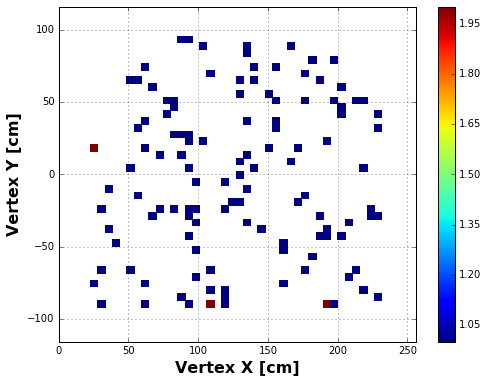

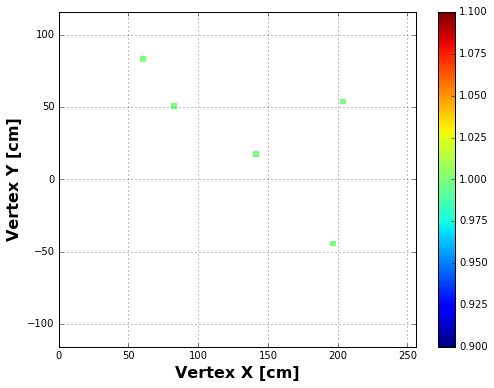

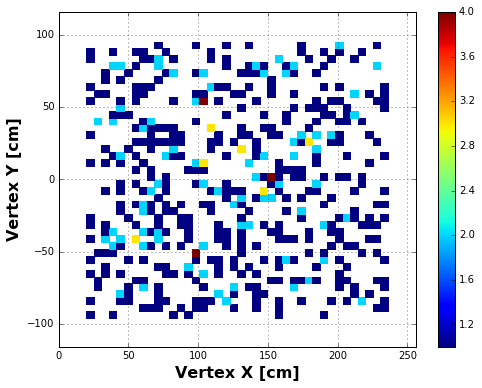

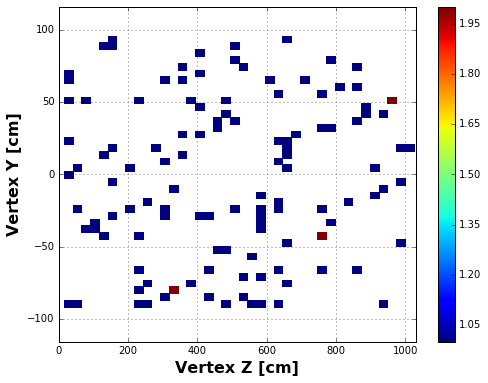

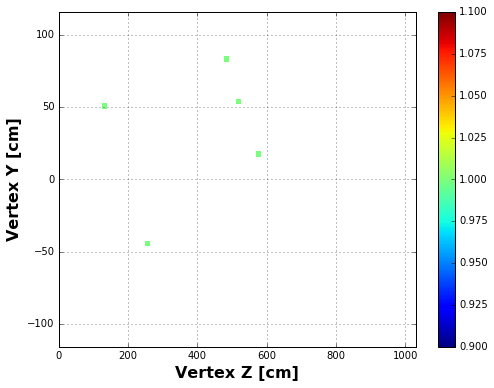

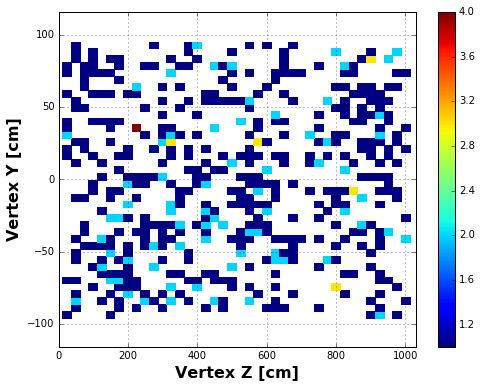

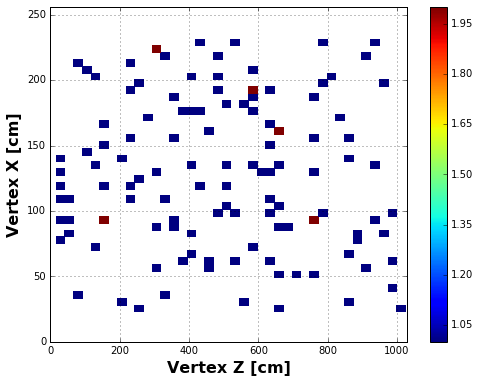

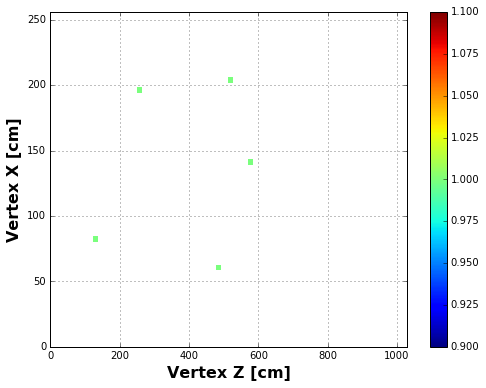

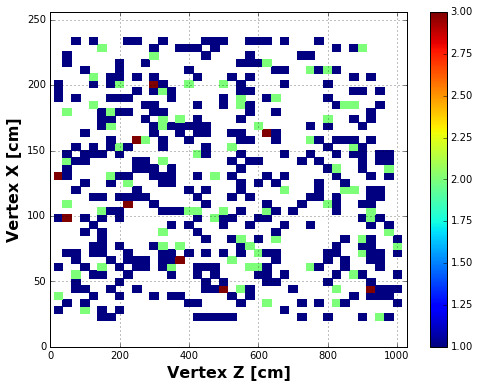

In [14]:
# Vertex 2D Plots
make2DPlots('vtxx','vtxy',0,256,-116,116,bins=40,xlabel='Vertex X [cm]',ylabel='Vertex Y [cm]')
make2DPlots('vtxz','vtxy',0,1030,-116,116,bins=40,xlabel='Vertex Z [cm]',ylabel='Vertex Y [cm]')
make2DPlots('vtxz','vtxx',0,1030,0,256,bins=40,xlabel='Vertex Z [cm]',ylabel='Vertex X [cm]')


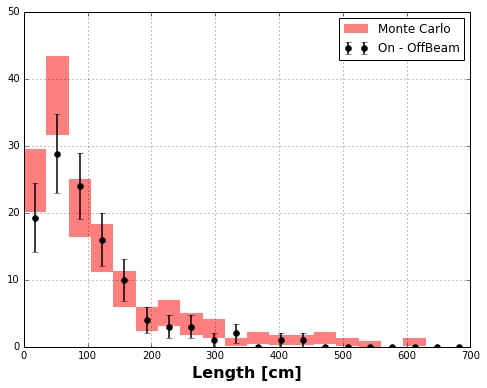

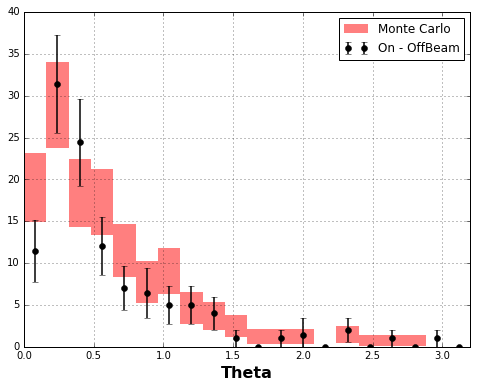

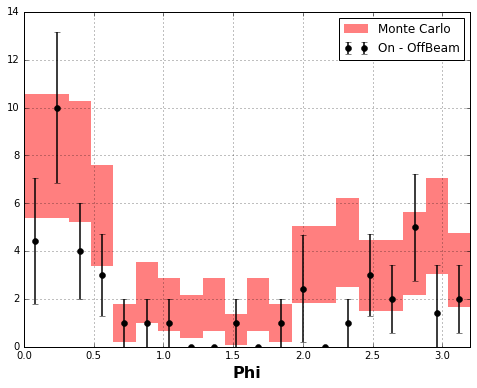

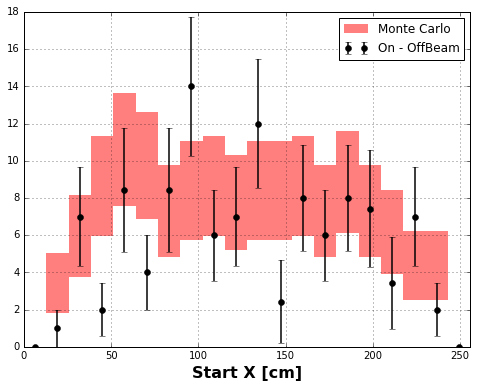

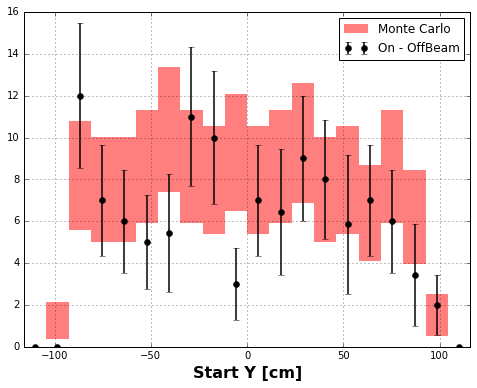

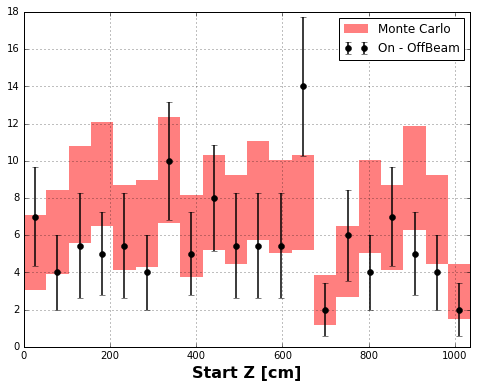

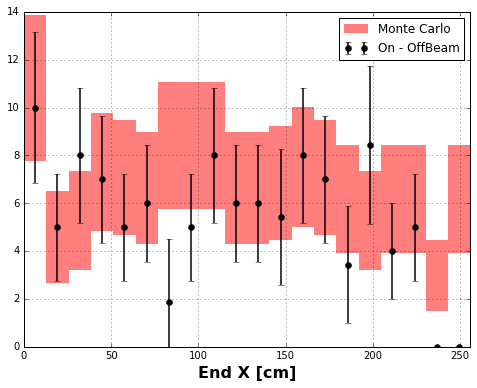

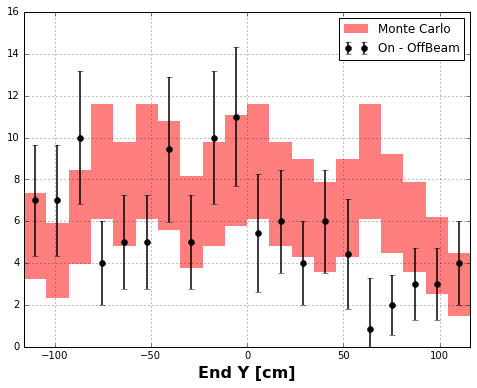

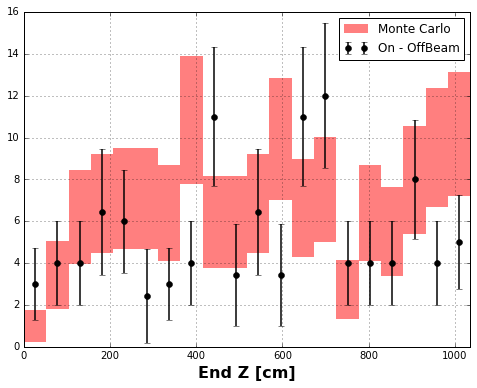

In [15]:
# Track Plots
makePlots('length',0,700,xlabel='Length [cm]')
makePlots('theta',0,3.2,xlabel='Theta')
makePlots('phi',0,3.2,xlabel='Phi')
makePlots('startx',0,256,xlabel='Start X [cm]')
makePlots('starty',-116,116,xlabel='Start Y [cm]')
makePlots('startz',0,1036,xlabel='Start Z [cm]')
makePlots('endx',0,256,xlabel='End X [cm]')
makePlots('endy',-116,116,xlabel='End Y [cm]')
makePlots('endz',0,1036,xlabel='End Z [cm]')

NameError: global name 'nbins' is not defined

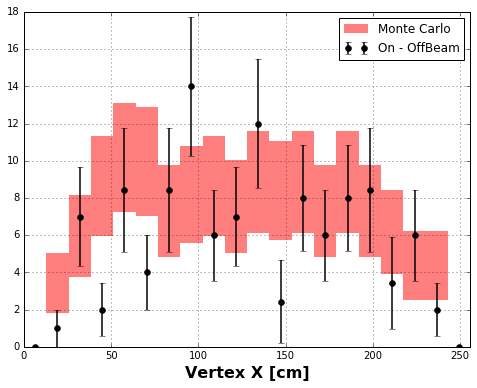

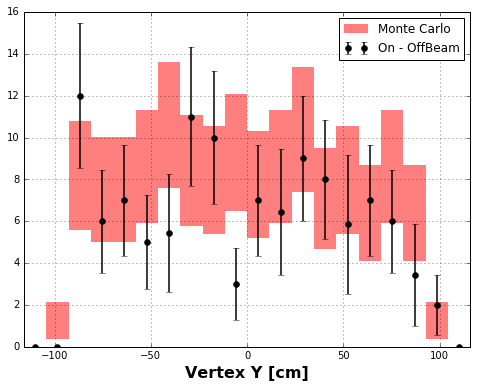

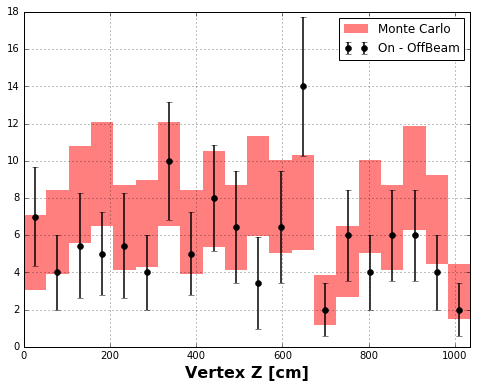

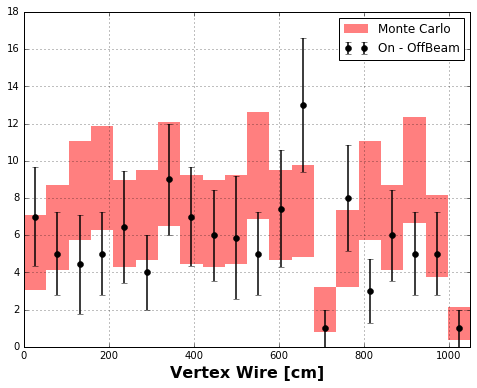

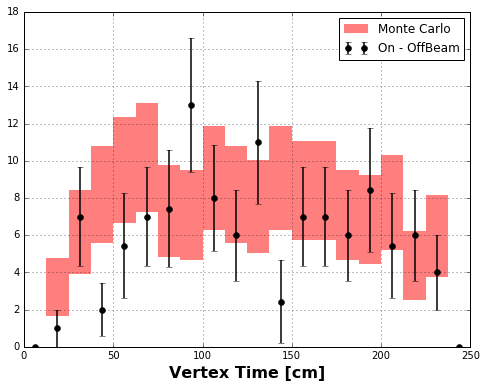

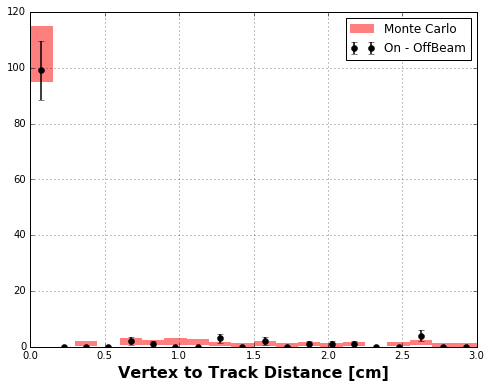

In [10]:
# Vertex 1D Plots
makePlots('vtxx',0,256,xlabel='Vertex X [cm]')
makePlots('vtxy',-116,116,xlabel='Vertex Y [cm]')
makePlots('vtxz',0,1036,xlabel='Vertex Z [cm]')
makePlots('vtxw',0,1050,xlabel='Vertex Wire [cm]')
makePlots('vtxt',0,250,xlabel='Vertex Time [cm]')
makePlots('vtx_trk_dist',0,3,xlabel='Vertex to Track Distance [cm]')
makeMCPlots('vtx_mc_reco_dist',0,30,xlabel='MC - Reco 3D Vertex Distance [cm]')
makeMCPlots('vtx_mc_reco_dist_2d',0,30,xlabel='MC - Reco 2D Vertex Distance [cm]')


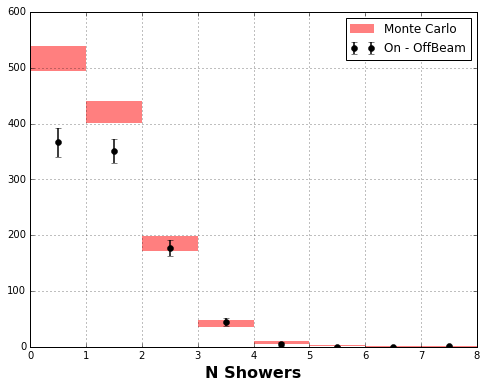

In [18]:
# N Showers
makePlots('nshrs',0,8,nbins=8,xlabel='N Showers')


In [ ]:
# Showers
stage='pi0'

f0 = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/LowLevelAnaFiles/OnBeam/lowlevel_pi0_ana.root', treename='shower_tree')
df0 = pd.DataFrame(f0)

f1 = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/LowLevelAnaFiles/OffBeam/lowlevel_pi0_ana.root', treename='shower_tree')
df1 = pd.DataFrame(f1)

f2 = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/LowLevelAnaFiles/MCBNBCos/lowlevel_pi0_ana.root', treename='shower_tree')
df2 = pd.DataFrame(f2)

In [6]:
# Showers
stage='ratio'

f0 = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/LowLevelAnaFiles/OnBeam/lowlevel_ratio_ana.root', treename='shower_tree')
df0 = pd.DataFrame(f0)

f1 = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/LowLevelAnaFiles/OffBeam/lowlevel_ratio_ana.root', treename='shower_tree')
df1 = pd.DataFrame(f1)

f2 = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/LowLevelAnaFiles/MCBNBCos/lowlevel_ratiocut_ana.root', treename='shower_tree')
df2 = pd.DataFrame(f2)

In [ ]:
# Shower Plots
makePlots('shr_startx',0,256,xlabel='Shower Start X [cm]')
makePlots('shr_starty',-116,116,xlabel='Shower Start Y [cm]')
makePlots('shr_startz',0,1036,xlabel='Shower Start Z [cm]')
makePlots('shr_startw',0,1036,xlabel='Shower Start Wire [cm]')
makePlots('shr_startt',0,256,xlabel='Shower Start Time [cm]')

makePlots('shr_dirx',-1,1,xlabel='Shower Dir X [cm]')
makePlots('shr_diry',-1,1,xlabel='Shower Dir Y [cm]')
makePlots('shr_dirz',-1,1,xlabel='Shower Dir Z [cm]')

makePlots('shr_energy',0,1000,xlabel='Shower Energy [MeV]')
makePlots('shr_oangle',0,3.2,xlabel='Shower Opening Angle')
makePlots('shr_dedx',0,5,xlabel='Shower Start dEdx')
makePlots('shr_vtx_dist',0,70,xlabel='Reco Vertex - Shower Distance [cm]')
makePlots('shr_trk_delta_phi',-6.4,6.4,xlabel='Track $\\Delta \\phi$')
makePlots('shr_trk_delta_theta',-3.2,3.2,xlabel='Track $\\Delta \\theta$')

In [ ]:
# Tracks and Vertices
stage='ratiocut'

f0 = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/LowLevelAnaFiles/OnBeam/lowlevel_ratio_ana.root', treename='hit_tree')
df0 = pd.DataFrame(f0)

f1 = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/LowLevelAnaFiles/OffBeam/lowlevel_ratio_ana.root', treename='hit_tree')
df1 = pd.DataFrame(f1)

f2 = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/LowLevelAnaFiles/MCBNBCos/lowlevel_ratiocut_ana.root', treename='hit_tree')
df2 = pd.DataFrame(f2)

In [ ]:
# Hits
stage='pi0'

f0 = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/LowLevelAnaFiles/OnBeam/lowlevel_pi0_ana.root', treename='hit_tree')
df0 = pd.DataFrame(f0)

f1 = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/LowLevelAnaFiles/OffBeam/lowlevel_pi0_ana.root', treename='hit_tree')
df1 = pd.DataFrame(f1)

f2 = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/LowLevelAnaFiles/MCBNBCos/lowlevel_pi0_ana.root', treename='hit_tree')
df2 = pd.DataFrame(f2)

In [ ]:
def makeHitPlots(var,var_min,var_max,bins=20,xlabel='',plane=2):
    
    df00 = df0.query('plane == %i'% plane)
    df11 = df1.query('plane == %i'% plane)
    df22 = df2.query('plane == %i'% plane)
    
    x_on, y_on = np.histogram(df00[var].values,bins=bins,range=(var_min,var_max))
    x_off, y_off = np.histogram(df11[var].values,bins=bins,range=(var_min,var_max))
    x_bnb, y_bnb = np.histogram(df22[var].values,bins=bins,range=(var_min,var_max))

    bins = (y_off[:-1] + y_off[1:])/2
    bin_width = bins[1]-bins[0]

    bnbcos_m = x_bnb * mc_to_onbeam 
    off_min_on_m = x_on - x_off*off_to_on

    off_min_on_m = [off_min_on_m[i] if off_min_on_m[i] >=0 else 0 for i in xrange(len(off_min_on_m)) ]

    err_on = np.sqrt(x_on)
    err_off = np.sqrt(x_off)
    err_data = np.sqrt(err_on * err_on + err_off * err_off)
    err_mc = np.sqrt(bnbcos_m)

    fig,ax = plt.subplots(figsize=(8,6))
    #plt.bar(bins - bin_width/2,err_mc*2,bin_width,bottom = bnbcos_m - err_mc/2.,\
    #    alpha=0.5, color='r', linewidth=0,label='Monte Carlo')
    plt.errorbar(bins,bnbcos_m,yerr=err_mc,fmt='r-',label='Monte Carlo',markersize=6,lw=1.5)
    plt.errorbar(bins,off_min_on_m,yerr=err_data,fmt='k-',label='On - OffBeam',markersize=6,lw=1.5)
    plt.grid(True)
    #handles,labels = ax.get_legend_handles_labels()
    plt.xlim(var_min,var_max)
    plt.xlabel(xlabel,fontsize=16,weight='bold')
    plt.legend(loc=0) #handles=handles[::-1],fontsize=12)
    plt.ylim(0)
    plt.savefig('Plots/LL_%s_%s_%i'%(stage,var,plane))
    

In [ ]:
def makeHitPlotsPerPlane():
    
    df00 = df0.query('plane == 0'); df01 = df0.query('plane == 1'); df02 = df0.query('plane == 2')
    df10 = df1.query('plane == 0'); df11 = df1.query('plane == 1'); df12 = df1.query('plane == 2')
    df20 = df2.query('plane == 0'); df21 = df2.query('plane == 1'); df22 = df2.query('plane == 2')
    
    x = [0,1,2]
    y_mc = np.array([ float(df20.shape[0]), float(df21.shape[0]), float(df22.shape[0])])
    y_mc *= mc_to_onbeam

    y_data = np.array([ df00.shape[0] - df10.shape[0] * off_to_on, 
                        df01.shape[0] - df11.shape[0] * off_to_on, 
                        df02.shape[0] - df12.shape[0] * off_to_on ] ) 

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_axes((0,0,1,1)) #900000))
    ax.set_xlim([-0.5, 2.5])
    plt.plot(x,y_mc,'ro',markersize=10,label='Monte Carlo')
    plt.plot(x,y_data,'ko',markersize=10,label='On-Off Beam')
    ax.set_xticks([0,1,2])
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticklabels(['Plane 0','Plane 1', 'Plane 2'],fontsize=20) #'CONFIRMED BY\nEXP
    plt.grid(True)
    plt.ylabel('#Hits',fontsize=16,weight='bold')
    #plt.xlabel('Plane',fontsize=16,weight='bold')
    plt.legend(loc=0) 
    #plt.savefig('Plots/LL_%s_hits_per_plane.png'%stage)
    
    y_mc = np.array([df20['charge'].sum(), df21['charge'].sum(), df22['charge'].sum()])
    y_mc *= mc_to_onbeam
    
    y_data = np.array([ df00['charge'].sum() -  df10['charge'].sum() * off_to_on, 
                       df01['charge'].sum() -  df11['charge'].sum() * off_to_on, 
                       df02['charge'].sum() -  df12['charge'].sum() * off_to_on])
    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_axes((0,0,1,1)) 
    ax.set_xlim([-0.5, 2.5])
    plt.plot(x,y_mc,'ro',markersize=10,label='Monte Carlo')
    plt.plot(x,y_data,'ko',markersize=10,label='On-Off Beam')
    ax.set_xticks([0,1,2])
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticklabels(['Plane 0','Plane 1', 'Plane 2'],fontsize=20) #'CONFIRMED BY\nEXP
    plt.grid(True)
    plt.ylabel('Sum Charge',fontsize=16,weight='bold')
    #plt.xlabel('Plane',fontsize=16,weight='bold')
    plt.legend(loc=0) 
    #plt.savefig('Plots/LL_%s_charge_per_plane.png' %stage)
    

In [ ]:
# Hit Plots per Hit
makeHitPlotsPerPlane()

In [ ]:
# Hit Plots per Hit
makeHitPlots('gof',0,1.,bins=200,xlabel='Goodness of Fit',plane=2)
makeHitPlots('time_width',0,1,bins=200,xlabel='Time Width',plane=2)
makeHitPlots('charge',0,1000,bins=200,xlabel='Hit Area',plane=2)
makeHitPlots('time_peak',0,6400,bins=200,xlabel='Time Peak',plane=2)



In [ ]:
makePlots('shr_trk_delta_phi',-6,6,xlabel='Track $\\Delta \\phi$')
makePlots('shr_trk_delta_theta',-3.2,3.2,xlabel='Track $\\Delta \\theta$')